### the goal is to cluster the customers based on fainantial behavior to put the swietable Marketing plan for them

goal is to group customers into clusters that share similar financial and behavioral 
characteristics, using unsupervised learning techniques. 

```
Input variables:
# bank client data:
1 - age (numeric).
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services").
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
4 - education (categorical: "unknown","secondary","primary","tertiary").
5 - default: has credit in default? (binary: "yes","no").
6 - balance: average yearly balance, in euros (numeric) .
7 - housing: has housing loan? (binary: "yes","no").
8 - loan: has personal loan? (binary: "yes","no").
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular").
10 - day: last contact day of the month (numeric).
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec").
12 - duration: last contact duration, in seconds (numeric).
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
15 - previous: number of contacts performed before this campaign and for this client (numeric).
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

```

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/bank-full.csv')

In [4]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28528,30,management,married,tertiary,no,24,yes,no,cellular,29,jan,207,2,-1,0,unknown,no
36620,33,blue-collar,single,secondary,no,1794,yes,no,cellular,12,may,360,1,173,1,other,no
37052,32,services,married,secondary,no,413,yes,no,telephone,13,may,67,1,365,1,failure,no
34072,31,self-employed,single,tertiary,no,1815,no,no,telephone,30,apr,107,1,80,1,success,no
44964,21,blue-collar,single,primary,no,-42,no,no,unknown,10,oct,5,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

In [7]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
print(f"{len(df['job'].unique())} unique job titles in the dataset.", df['job'].unique())
print(f'{len(df["education"].unique())} unique education levels in the dataset.', df['education'].unique())
print(f'{len(df["marital"].unique())} unique marital statuses in the dataset.', df['marital'].unique())
print(f'{len(df["month"].unique())} unique months in the dataset.', df['month'].unique())
print(f'{len(df["poutcome"].unique())} unique poutcomes in the dataset.', df['poutcome'].unique())
print(f'{(df["age"] < 0).sum()} negative ages in the dataset.')
print(f'{(df["balance"] < 0).sum()} negative balances in the dataset.')

12 unique job titles in the dataset. ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
4 unique education levels in the dataset. ['tertiary' 'secondary' 'unknown' 'primary']
3 unique marital statuses in the dataset. ['married' 'single' 'divorced']
12 unique months in the dataset. ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
4 unique poutcomes in the dataset. ['unknown' 'failure' 'other' 'success']
0 negative ages in the dataset.
3766 negative balances in the dataset.


In [10]:
def plot_df_balance(df):
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        
        # Check if column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.boxplot(x=df[col], color='skyblue')
            plt.title(f'Boxplot of Numeric Column: {col}')
            
        # Check if column is categorical (object, category, or bool)
        else:
            sns.countplot(x=df[col], palette='viridis', hue=df[col], legend=False)
            plt.title(f'Count Plot of Categorical Column: {col}')
            plt.xticks(rotation=45)
            
        plt.tight_layout()
        plt.show()

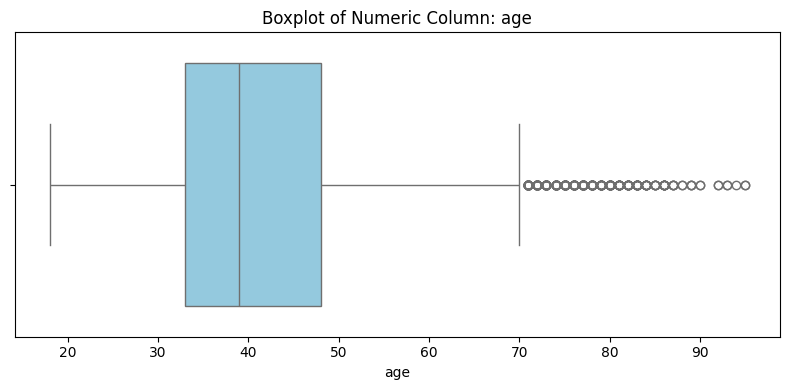

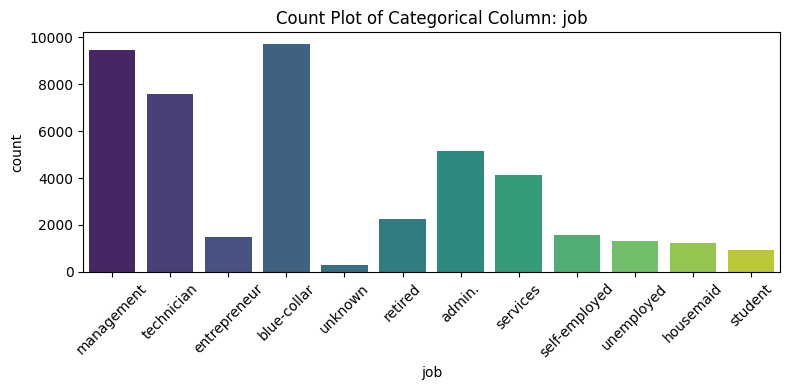

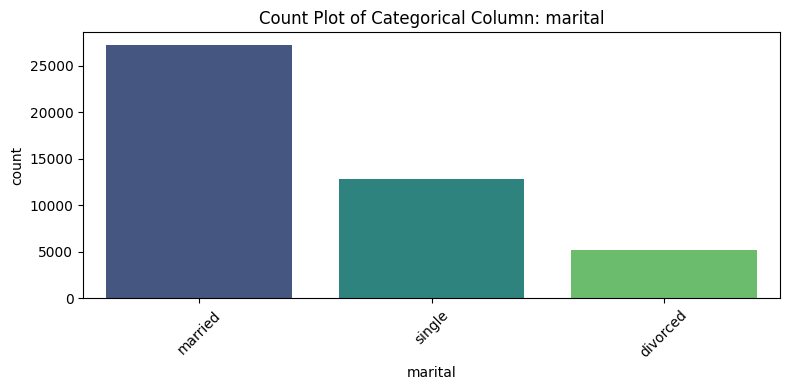

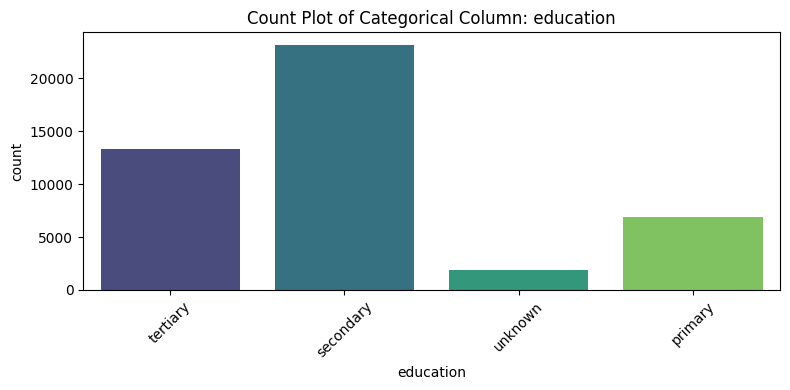

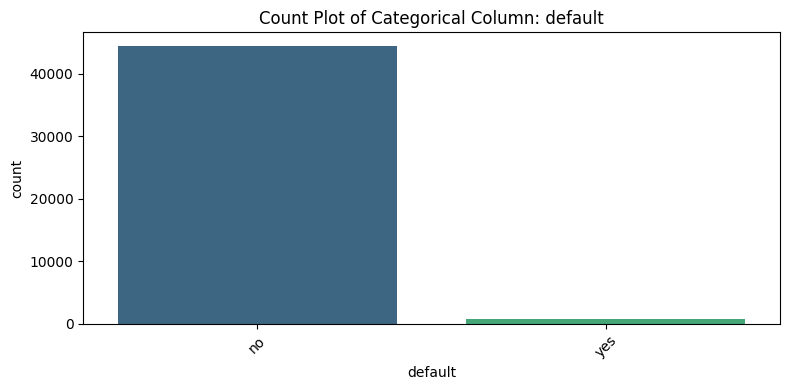

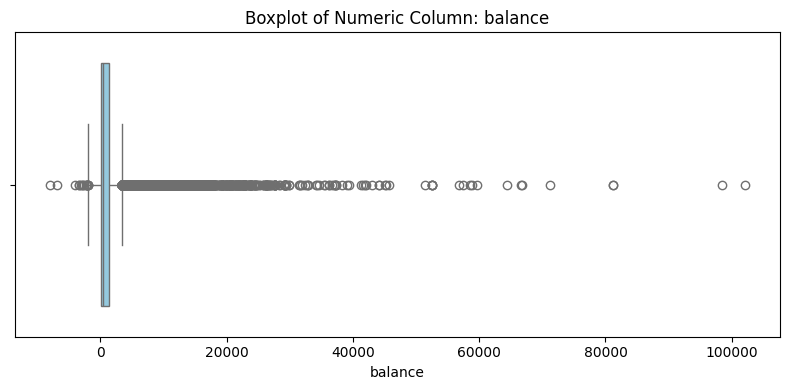

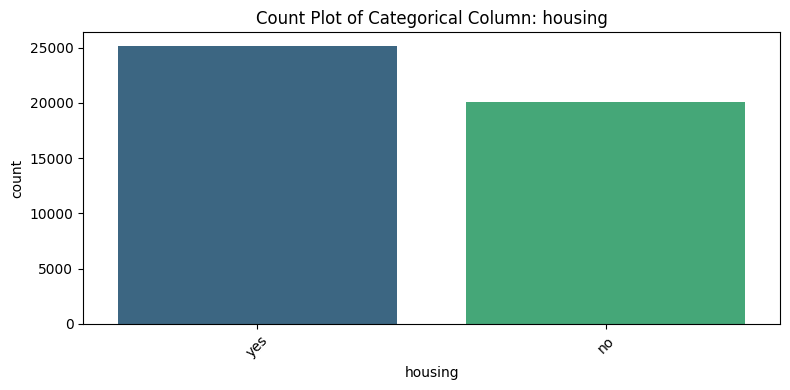

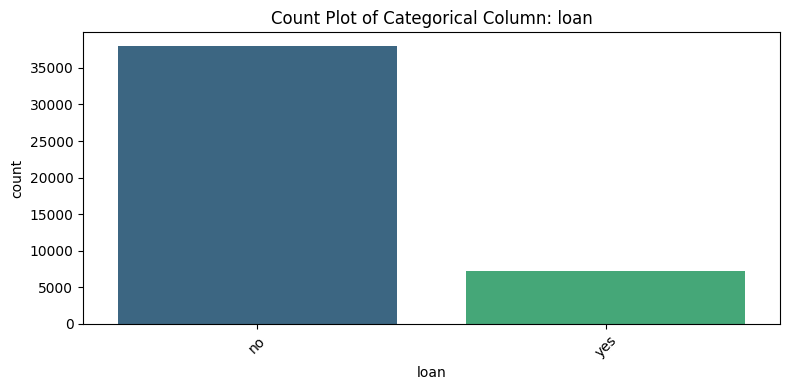

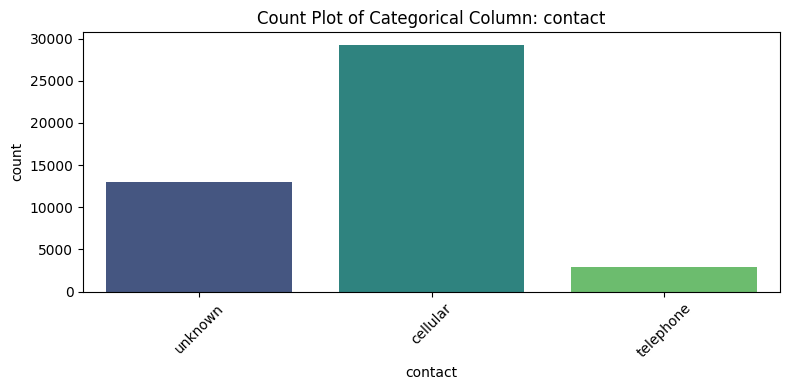

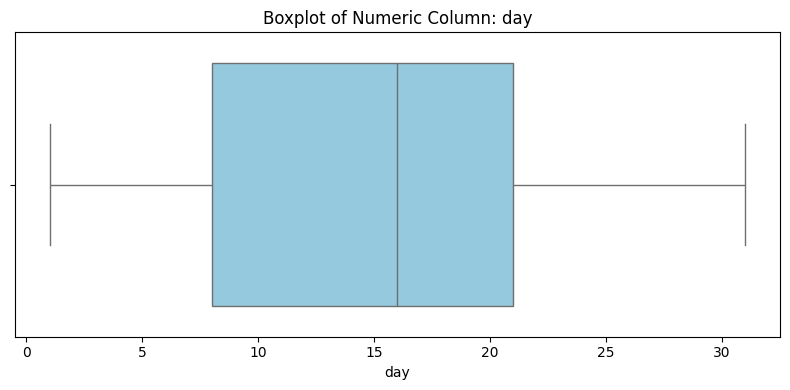

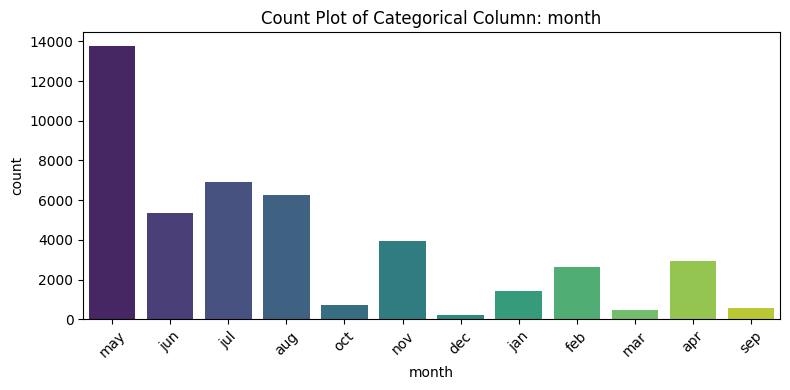

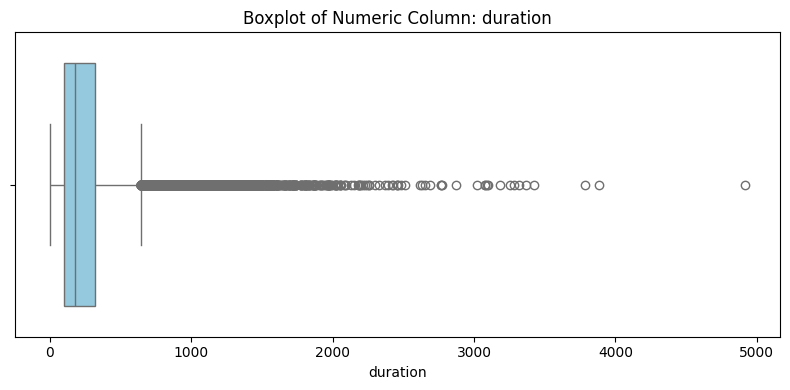

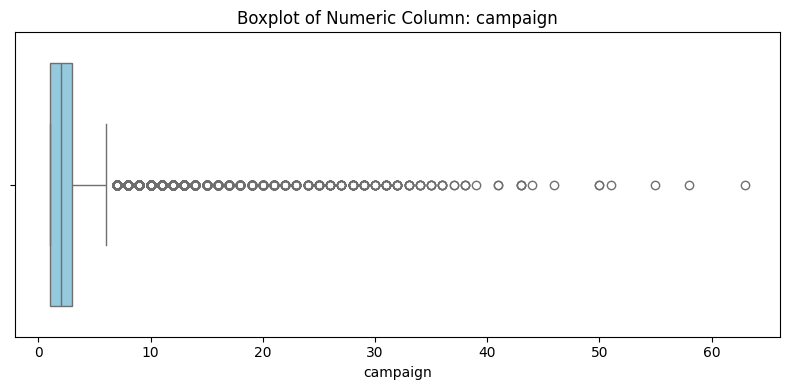

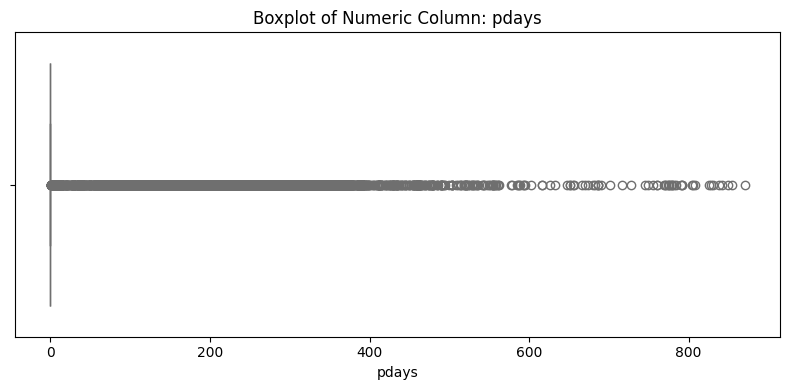

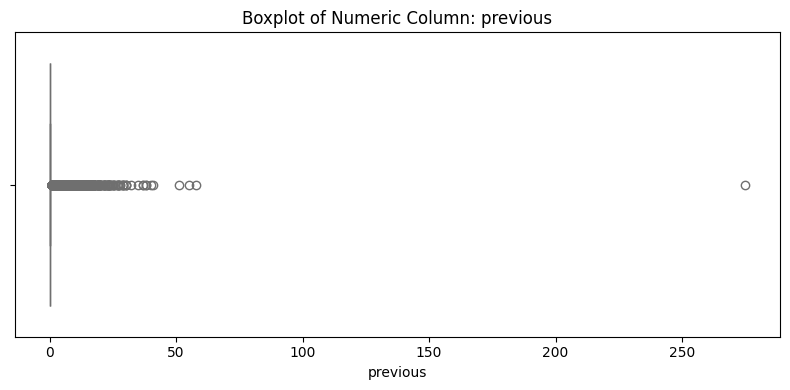

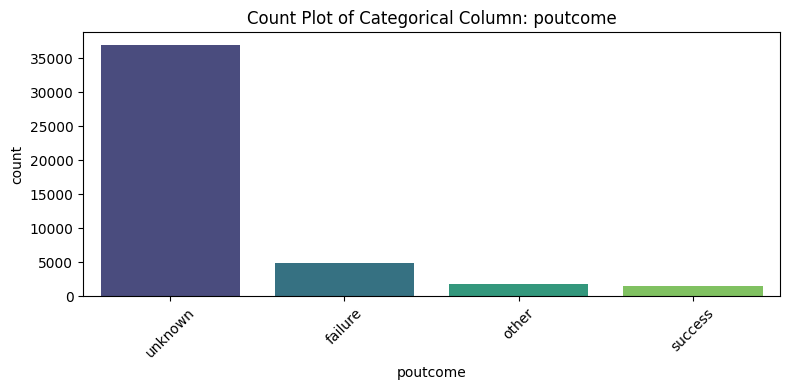

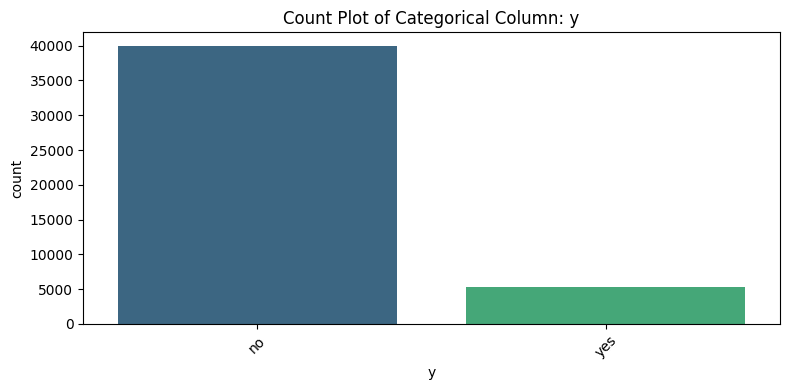

In [11]:
plot_df_balance(df)

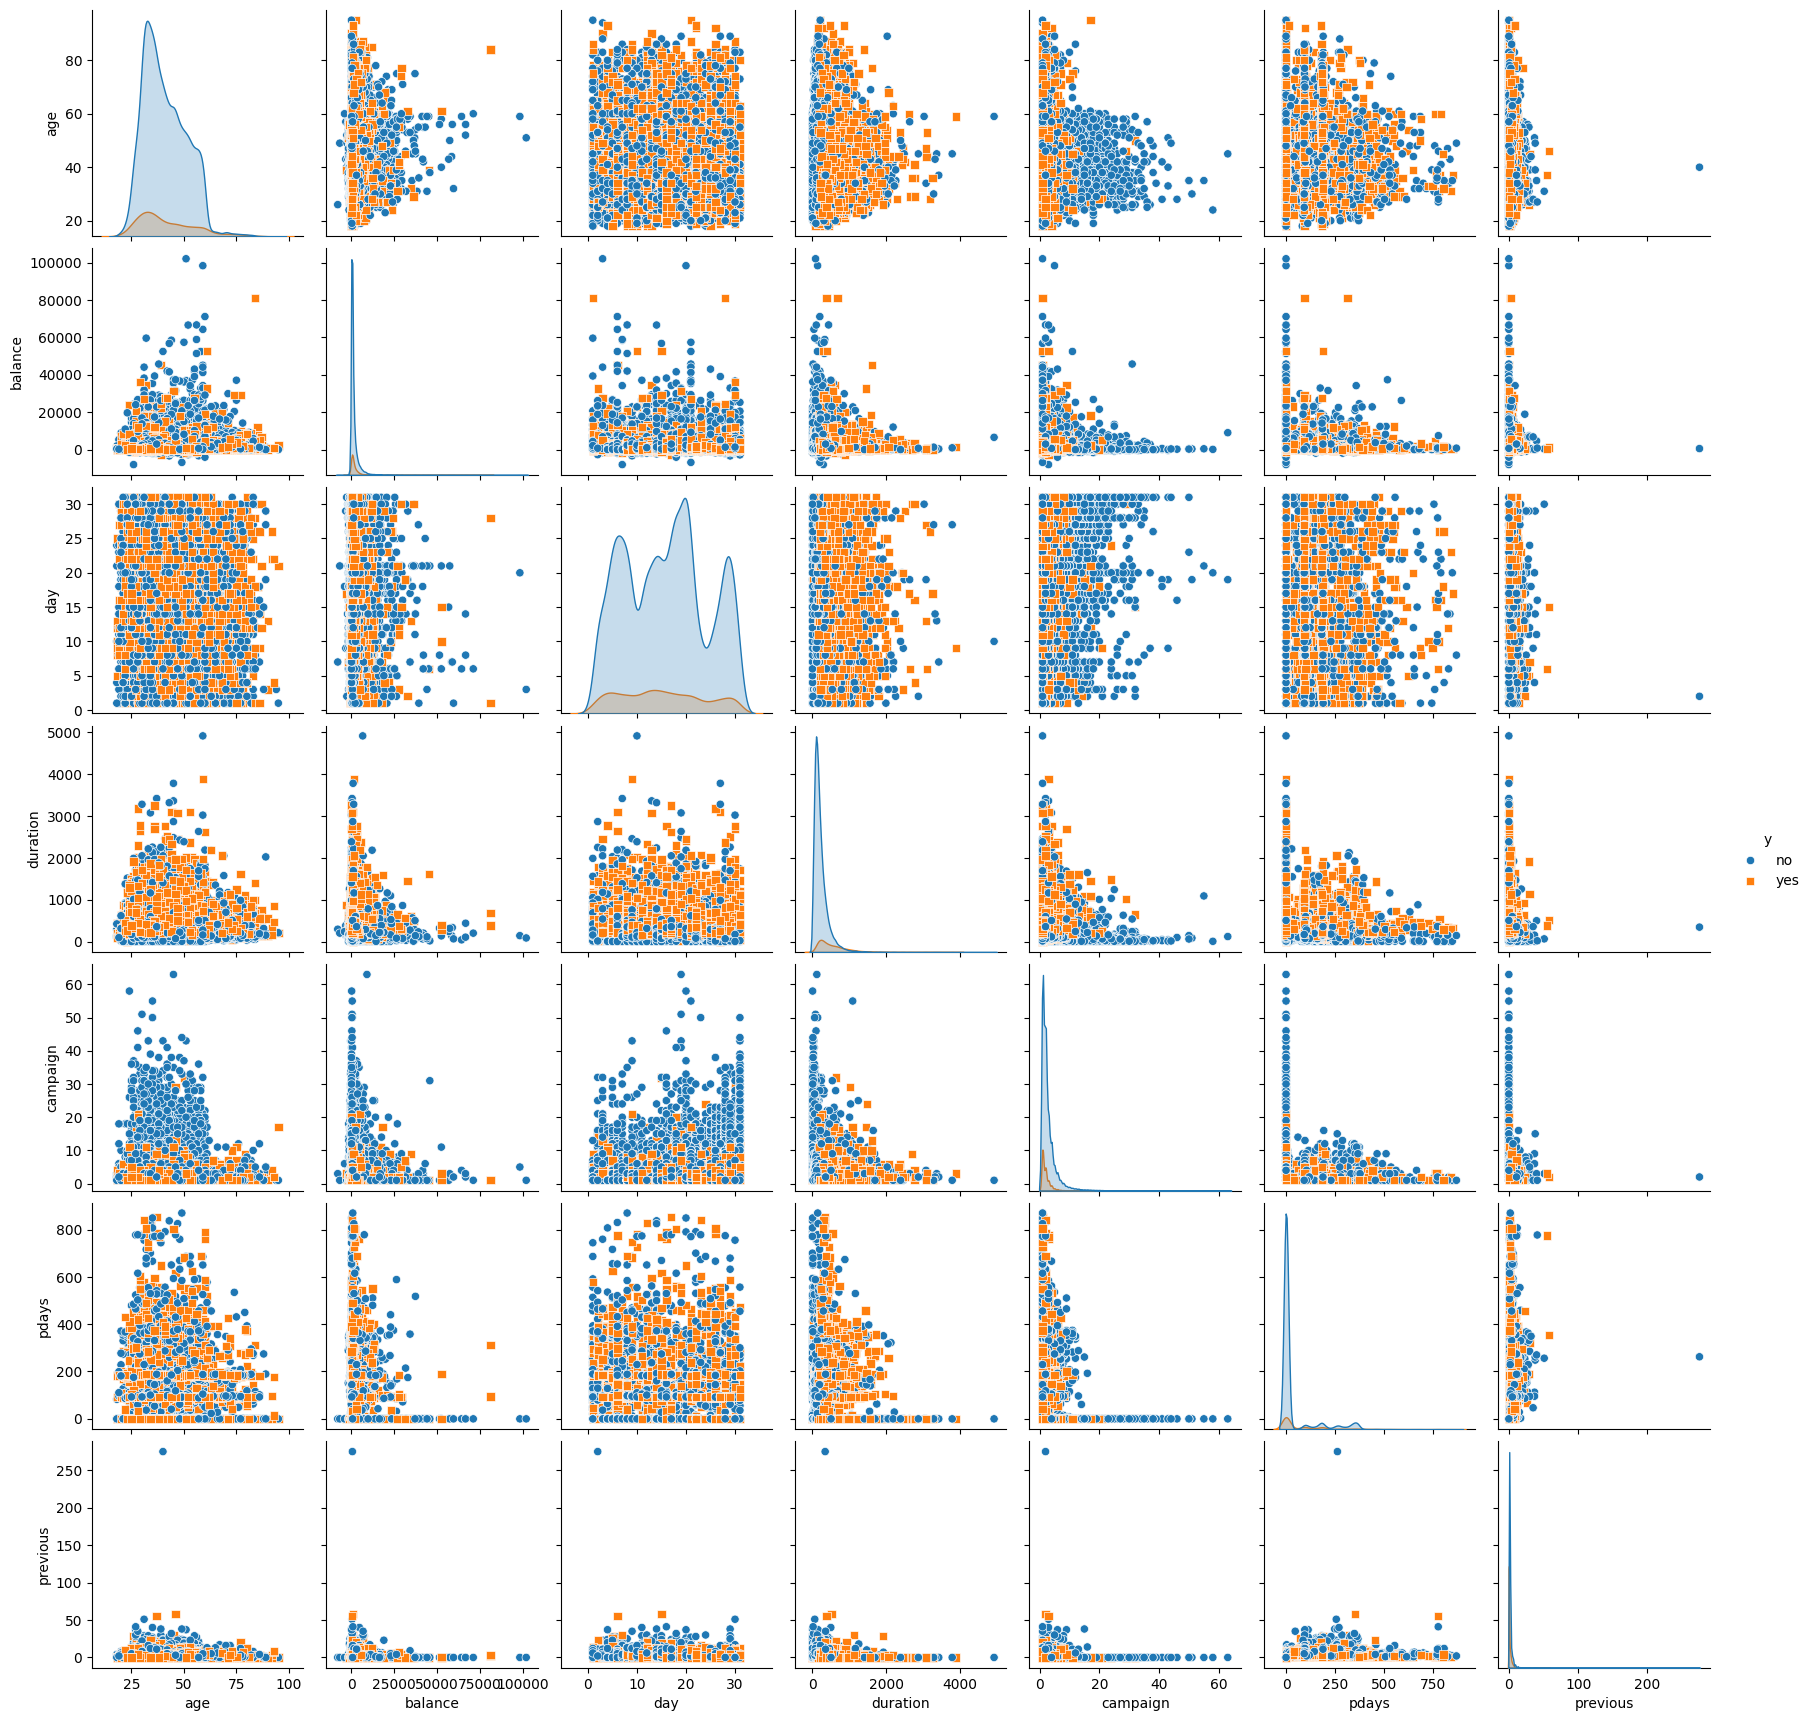

In [12]:
sns.pairplot(df, hue='y', markers=["o", "s"])
plt.show()

## selecting the relevant columns

In [13]:
df = df.drop(columns=[
    'education',   # Education level
    'default',     # Credit default
    'housing',     # Housing loan
    'loan',        # Personal loan
    'contact',     # Contact communication type
    'day',         # Day of month
    'month',       # Month
    'previous',    # Previous number of contacts
    'poutcome',    # Previous campaign outcome
    'y'            # Target variable (output)
])

In [14]:
df.shape

(45211, 7)

In [15]:
print(f'{(df["balance"] < 0).sum()} negative balances in the dataset.')

3766 negative balances in the dataset.


In [16]:
df.shape

(45211, 7)

In [17]:
df.sample(5)

,age,job,marital,balance,duration,campaign,pdays
2159,39,blue-collar,single,446,183,1,-1
43428,37,admin.,married,0,208,3,349
12201,45,technician,single,302,36,4,-1
706,44,technician,single,78,13,6,-1
8315,50,blue-collar,married,33,134,8,-1


## categorical columns encoding

user the one-hot-encoding seince that is the best for the k-means model

In [18]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)

In [19]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
df.sample(5)

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
42697,42,994,453,1,67,False,False,False,False,False,False,False,False,True,False,False,True,False
15638,35,103,304,1,-1,False,False,False,False,False,False,False,False,True,False,False,False,False
21263,46,0,74,4,-1,False,False,False,False,False,False,True,False,False,False,False,True,False
28905,31,295,78,5,-1,False,False,False,False,False,False,True,False,False,False,False,False,True
15,51,229,353,1,-1,False,False,False,False,True,False,False,False,False,False,False,True,False


columns names after encoding:

In [21]:
df.columns.tolist()

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single']

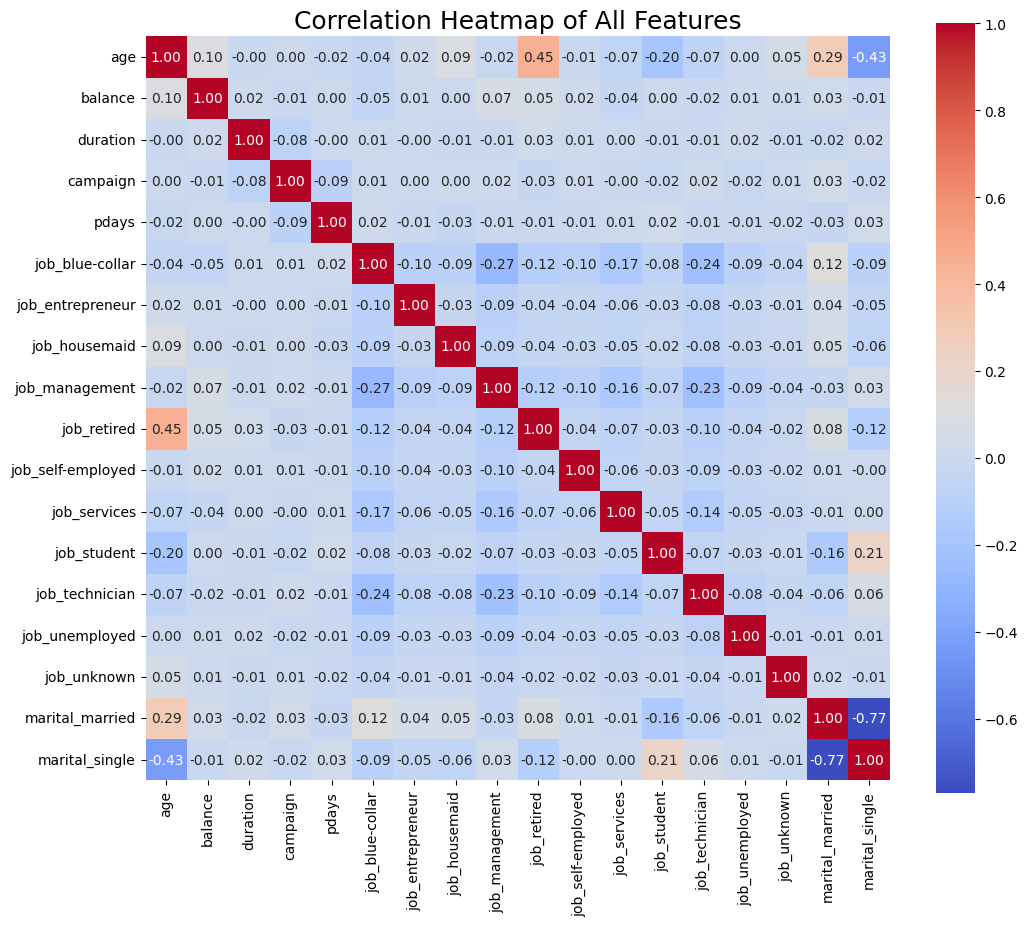

In [22]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of All Features", fontsize=18)
plt.show()

## data scaling

we will use the standard scalling couse that is the best for the k-means model

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [25]:
X

array([[ 1.60696496,  0.25641925,  0.0110161 , ..., -0.08006853,
         0.81321217, -0.62809028],
       [ 0.28852927, -0.43789469, -0.41612696, ..., -0.08006853,
        -1.22969139,  1.59212782],
       [-0.74738448, -0.44676247, -0.70736086, ..., -0.08006853,
         0.81321217, -0.62809028],
       ...,
       [ 2.92540065,  1.42959305,  3.37379688, ..., -0.08006853,
         0.81321217, -0.62809028],
       [ 1.51279098, -0.22802402,  0.97014641, ..., -0.08006853,
         0.81321217, -0.62809028],
       [-0.37068857,  0.52836436,  0.39932797, ..., -0.08006853,
         0.81321217, -0.62809028]])

## Dimensionality Reduction

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [28]:
X_pca

array([[-1.43267179, -1.31028139],
       [ 1.73059631, -0.63154902],
       [-0.70073829,  0.64065752],
       ...,
       [-3.36324329, -3.15413998],
       [-1.70270963,  1.33168248],
       [-0.85001777,  0.25379567]])

# Model selection

In [29]:
from sklearn.cluster import KMeans

### Elbow Method

In [30]:
inertia = []
K = range(1, 11)

In [31]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

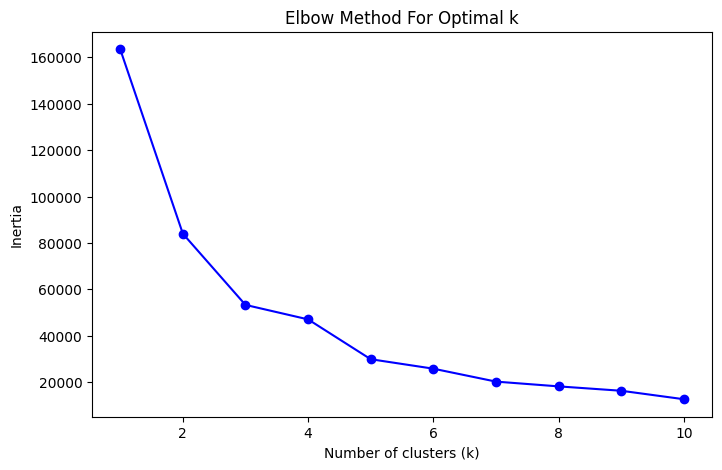

In [32]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

 5-Clusters is pretty good

### silhouette score

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(
        X_pca,
        labels,
        sample_size=5000,   # try 2000–5000
        random_state=42
    )
    scores.append(score)

In [35]:
scores

[0.49472378537692246,
 0.43804244826796684,
 0.3708280381499711,
 0.4375813294862502,
 0.4583442447287942,
 0.4199255805591394,
 0.4529282355799269,
 0.43392132726314275,
 0.46579914352907653]

yes, 5 is prrety good

In [36]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [37]:
clusters = kmeans.fit_predict(X_pca)
df['Cluster'] = clusters

In [38]:
df.sample(5)

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,Cluster
34760,45,1558,179,1,-1,True,False,False,False,False,False,False,False,False,False,False,True,False,0
11912,39,0,13,11,-1,False,False,False,False,False,True,False,False,False,False,False,False,True,3
30034,53,856,102,2,-1,False,False,False,False,False,False,False,False,True,False,False,True,False,4
7764,29,579,296,2,-1,False,False,False,False,False,True,False,False,False,False,False,False,True,1
11740,50,396,716,2,-1,False,False,False,False,False,False,False,False,True,False,False,False,False,4


In [39]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
Cluster,,,,,,,,,,,,,,,,,,
0,40.760005,877.787526,248.993150,3.136041,43.654248,0.915034,0.005047,0.000481,0.000000,0.000000,0.001082,0.068982,0.000000,0.003605,0.000240,0.000000,0.915154,0.000000
1,30.518565,722.210497,252.770380,2.692630,51.682300,0.277219,0.015215,0.001396,0.000279,0.000000,0.029034,0.155918,0.127722,0.228364,0.017309,0.000000,0.006840,0.967895
2,60.910242,4139.034383,293.661600,2.369888,35.655447,0.001086,0.009410,0.017372,0.130655,0.807818,0.007962,0.001810,0.000000,0.004705,0.002533,0.010496,0.798046,0.030040
3,36.993510,1839.305312,285.733776,2.568669,39.014036,0.001811,0.019318,0.019620,0.517809,0.004377,0.036976,0.028524,0.003471,0.200724,0.045729,0.010414,0.000755,0.868246
4,43.248955,1253.297291,250.008998,2.753749,35.740866,0.005753,0.058121,0.051532,0.278507,0.000148,0.053843,0.111570,0.000000,0.225599,0.042632,0.009343,0.852633,0.000983


clusters visualization

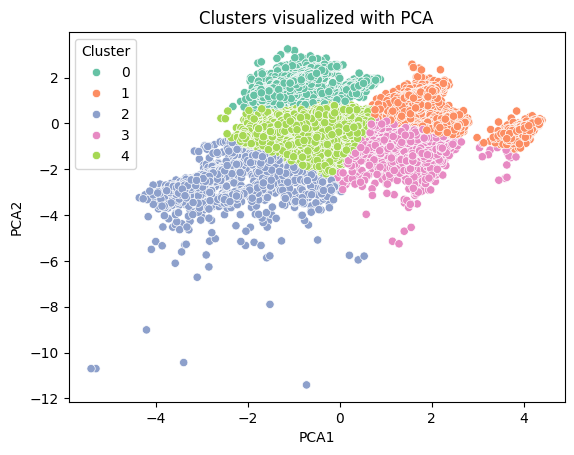

In [40]:
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Clusters visualized with PCA')
plt.show()

```
Cluster 0 → Stable Working-Class Married Customers
Cluster 1 → Young Single Professionals
Cluster 2 → High-Value Married Managers
Cluster 3 → Students & Early-Career Prospects
Cluster 4 → Affluent Retired Customers
```